In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
prix_kWh = 0.1544 # en €, pas de prise en compte heures pleines/creuses ici
prix_Wh = prix_kWh/1000

# According to Direct Energie, ma conso annuel
# 10300 kW in 2020
# 7000 kW something in 2021

In [3]:
data_path = './data/Enedis_Conso_Heure_20191229-20211217_23105354542081.csv'

In [4]:
df = pd.read_csv(data_path, skiprows=0, sep=";", header=2, usecols=[0, 1])
#df.index = df.index.str.replace('+01:00','',regex=False) 
df.Horodate = pd.to_datetime(df.Horodate, utc=True)
df = df.set_index('Horodate')
#df.index = pd.DatetimeIndex(df.asfreq(freq='30min'))
#df.index = df.index.tz_convert("Europe/London")

In [5]:
print(df.dtypes)
print(df.index)

Valeur    float64
dtype: object
DatetimeIndex(['2020-06-15 03:00:00+00:00', '2020-06-15 04:00:00+00:00',
               '2020-06-15 05:00:00+00:00', '2020-06-15 06:00:00+00:00',
               '2020-06-15 07:00:00+00:00', '2020-06-15 08:00:00+00:00',
               '2020-06-15 09:00:00+00:00', '2020-06-15 10:00:00+00:00',
               '2020-06-15 11:00:00+00:00', '2020-06-15 12:00:00+00:00',
               ...
               '2021-12-16 18:30:00+00:00', '2021-12-16 19:00:00+00:00',
               '2021-12-16 19:30:00+00:00', '2021-12-16 20:00:00+00:00',
               '2021-12-16 20:30:00+00:00', '2021-12-16 21:00:00+00:00',
               '2021-12-16 21:30:00+00:00', '2021-12-16 22:00:00+00:00',
               '2021-12-16 22:30:00+00:00', '2021-12-16 23:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Horodate', length=22460, freq=None)


Pour éviter le pb du sampling freq qui passe de 1H à 30min le 31 oct 2020, on passe tout en 1h.

C'est très étrange mais les valeurs 30 min d'ENEDIS sont fausses et correspondent exactement chez moi au double de la conso réelle (telle que sur les relevés fournisseur, et donc les factures).
Du coup un moyen simple & dirty de palier à ça et d'ici aggréger par .mean() alors que cela aurait dû être .sum()

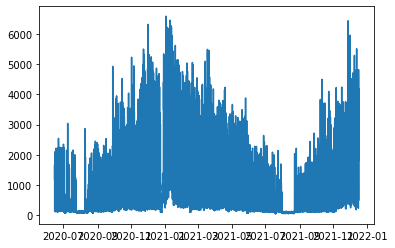

In [6]:
#df = df.Valeur.resample('H').sum()
df_h = df.resample('H').mean()
plt.plot(df_h);

Ensuite, on véfifie pour vraiment être sûr que ce que l'on trouve dans les données ici corresponds à ce que l'on a sur la facture (à checker à l'oeil).

In [7]:
valcheck = df_h.Valeur['2021-12-15 03:00:00+00:00']
print(valcheck)

1626.0


In [ ]:
df_month = df_h.resample('M').sum()
df_month['Valeur'] = df_month['Valeur']/1000
df_month['Cout'] = df_month['Valeur']*prix_kWh 
print(df_month)

In [ ]:
df_day = df_h.resample('D').sum()
df_day['Valeur'] = df_day['Valeur']/1000
df_day['Cout'] = df_day['Valeur']*prix_kWh
print(df_day)

In [ ]:
df_y = df_h.resample('Y').sum()
print(df_y)

In [ ]:
df_y['kW'] = df_y['Valeur']/1000
df_y['cout'] = df_y['Valeur']*prix_Wh
print(df_y)

In [ ]:
dfg = df.groupby([df.index.dt.year]).agg({'Valeur': sum})

In [ ]:
df

In [ ]:
# there is missing rows in the ENEDIS doc... so we need to take of this
start_time = df['Horodate'].iloc[0]
end_time = df['Horodate'].iloc[-1]
full_date = pd.date_range(start=start_time, end=end_time, freq='30min')

In [ ]:
df_new = pd.DataFrame({'Horodate':full_date})
df_new['Horodate'] = pd.to_datetime(df_new['Horodate'])

In [ ]:
df.dtypes

In [ ]:
df_new2 = df_new.join(df, on='Horodate')

In [ ]:
df.index = pd.to_datetime(df.index, utc=True)

In [ ]:
df.index

In [ ]:
a

In [ ]:
#df = pd.read_csv(data_path, skiprows=0, sep=";", header=2, usecols=[0, 1], index_col = 'Horodate')
#df.index = df.index.str.replace('+01:00','',regex=False) 
#df.index = pd.to_datetime(df.index, utc=True)
#df.index = pd.DatetimeIndex(df.asfreq(freq='30min'))
#df.index = df.index.tz_convert("Europe/London")

In [ ]:
#df = pd.read_csv(data_path, skiprows=0, sep=";", header=2, usecols=[0, 1])
#print(df.dtypes)
#df["Horodate"] = pd.to_datetime(df["Horodate"], utc=True)
#print(df.dtypes)
#df.head()
#df = df.set_index('Horodate')
#print(df.dtypes)
#df.head()
#.tz_localize("Europe/London")
#print(df.index)

In [ ]:
pd.infer_freq(df.index)

In [ ]:
freq = pd.infer_freq(df.index)
df.freq = pd.tseries.frequencies.to_offset(freq)

In [ ]:
pd.infer_freq(df.index) is None

In [ ]:
df.index.freq is None

In [ ]:
df.index = pd.DatetimeIndex(df.asfreq(freq='30min'))
#df.index.freq='30Min'
#print(df.index.freq)

In [ ]:
df.index = df["Horodate"].tz_localize("US").tz_convert("Europe/London")

In [ ]:
df["Horodate"].tz_localize("Europe/London")
#.tz_convert("UTC")

In [ ]:
df["Horodate"] 

In [ ]:
df['new'] = df['Horodate'].dt.tz_convert(None)

In [ ]:
df['Horodate'] = pd.to_datetime(df['Horodate'], utc=True)
#df = df.set_index('Horodate')

In [ ]:
df['Horodate']

In [ ]:
df['Horodate'].tz_convert("Europe/Berlin")

In [ ]:
#format = '%Y-%m-%d %H:%M:%S'
df['Horodate'] = pd.to_datetime(df['Horodate'], infer_datetime_format=True) #format=format)
#df['Datetime'].tz_convert("Europe/Berlin")
df = df.set_index(df['Horodate'])

In [ ]:
df['Horodate'].tz_convert("Europe/Berlin")

In [ ]:
#data = data.set_index('Horodate')
data['Horodate'].DatetimeIndex()

In [ ]:
# Replace missing values with the last one recorded (hopefully not too much)
print(f"{data['Valeur'].isna().sum()} missing values will be ffilled")
data['Valeur'] = data['Valeur'].ffill()
print(f"Done. {data['Valeur'].isna().sum()} missing values remaining")

In [ ]:
data_weekly_mean = data['Valeur'].resample('W').mean() # W stands for weekly